In [34]:
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import pymaster as nmt

from astropy.io import fits

### Run ONLY to download the files

In [12]:
!rm -rf 

In [13]:
!wget --progress=bar:force:noscroll "https://data.sdss.org/sas/dr12/boss/lss/galaxy_DR12v5_CMASS_North.fits.gz"
!wget --progress=bar:force:noscroll "https://data.sdss.org/sas/dr12/boss/lss/galaxy_DR12v5_CMASS_South.fits.gz"
    
!wget --progress=bar:force:noscroll "https://data.sdss.org/sas/dr12/boss/lss/mask_DR12v5_CMASS_North.fits.gz"
!wget --progress=bar:force:noscroll "https://data.sdss.org/sas/dr12/boss/lss/mask_DR12v5_CMASS_South.fits.gz"

--2023-11-27 17:37:40--  https://data.sdss.org/sas/dr12/boss/lss/galaxy_DR12v5_CMASS_North.fits.gz
Resolving data.sdss.org (data.sdss.org)... 155.101.19.31
Connecting to data.sdss.org (data.sdss.org)|155.101.19.31|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 138873951 (132M) [application/octet-stream]
Saving to: ‘galaxy_DR12v5_CMASS_North.fits.gz’

100%[======================================>] 138,873,951 38.5MB/s   in 4.0s   

2023-11-27 17:37:44 (33.2 MB/s) - ‘galaxy_DR12v5_CMASS_North.fits.gz’ saved [138873951/138873951]

--2023-11-27 17:37:44--  https://data.sdss.org/sas/dr12/boss/lss/galaxy_DR12v5_CMASS_South.fits.gz
Resolving data.sdss.org (data.sdss.org)... 155.101.19.31
Connecting to data.sdss.org (data.sdss.org)|155.101.19.31|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51580500 (49M) [application/octet-stream]
Saving to: ‘galaxy_DR12v5_CMASS_South.fits.gz’

100%[======================================>] 51,580,500  27.9

In [16]:
!gunzip galaxy_DR12v5_CMASS_North.fits.gz
!gunzip galaxy_DR12v5_CMASS_South.fits.gz
!gunzip mask_DR12v5_CMASS_North.fits.gz
!gunzip mask_DR12v5_CMASS_South.fits.gz


gzip: galaxy_DR12v5_CMASS_North.fits.gz: No such file or directory


### Open galaxies

In [35]:
cat_n = fits.open('galaxy_DR12v5_CMASS_North.fits')
cat_s = fits.open('galaxy_DR12v5_CMASS_South.fits')

In [36]:
cat_s[1].data['DEC']

array([ 9.97343985,  9.93335781, 10.14449632, ...,  2.76482679,
        2.75969877,  1.25537551])

(array([10768., 25874., 37269., 31568., 26064., 25048., 20625., 20280.,
        20870., 12465.]),
 array([-10.99258763,  -6.26965349,  -1.54671935,   3.17621479,
          7.89914893,  12.62208307,  17.34501721,  22.06795135,
         26.79088549,  31.51381963,  36.23675377]),
 <BarContainer object of 10 artists>)

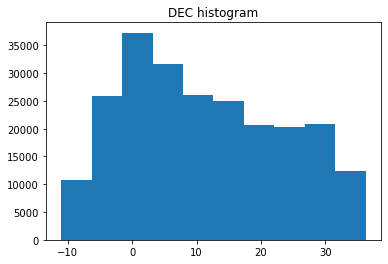

In [37]:
plt.title("DEC histogram")
plt.hist(cat_s[1].data['DEC'])

(array([117406.,  10777.,      0.,      0.,      0.,      0.,      0.,
             0.,   6952.,  95696.]),
 array([9.09066565e-05, 3.59998985e+01, 7.19997061e+01, 1.07999514e+02,
        1.43999321e+02, 1.79999129e+02, 2.15998936e+02, 2.51998744e+02,
        2.87998552e+02, 3.23998359e+02, 3.59998167e+02]),
 <BarContainer object of 10 artists>)

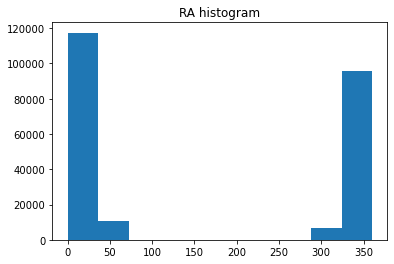

In [38]:
plt.title("RA histogram")
plt.hist(cat_s[1].data['RA'])

In [4]:
cat_n[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                  362 / width of table in bytes                        
NAXIS2  =               618806 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                   42 / number of fields in each row                   
TTYPE1  = 'RA      '           / label for field   1                            
TFORM1  = 'D       '           / data format of field: 8-byte DOUBLE            
TTYPE2  = 'DEC     '           / label for field   2                            
TFORM2  = 'D       '           / data format of field: 8-byte DOUBLE            
TTYPE3  = 'RUN     '        

In [39]:
cat_n_data = cat_n[1].data[cat_n[1].data['IMATCH'] == 1]
cat_n_data = cat_n_data[cat_n_data['Z'] > 0.01]
cat_s_data = cat_s[1].data[cat_s[1].data['IMATCH'] == 1]
cat_s_data = cat_s_data[cat_s_data['Z'] > 0.01]

In [40]:
cat_n_data.size + cat_s_data.size

836165

In [41]:
ras = np.append(np.array(cat_n_data['RA']), np.array(cat_s_data['RA']))
decs = np.append(np.array(cat_n_data['DEC']), np.array(cat_s_data['DEC']))
zs = np.append(np.array(cat_n_data['Z']), np.array(cat_s_data['Z']))
nzs = np.append(np.array(cat_n_data['NZ']), np.array(cat_s_data['NZ']))

(array([0.00395754, 0.01898056, 0.01945411, 0.01886311, 0.01834502,
        0.01564296, 0.01090304, 0.00939511, 0.0068297 , 0.0030517 ]),
 array([-10.99258763,  -3.01955901,   4.95346961,  12.92649822,
         20.89952684,  28.87255546,  36.84558407,  44.81861269,
         52.79164131,  60.76466992,  68.73769854]),
 <BarContainer object of 10 artists>)

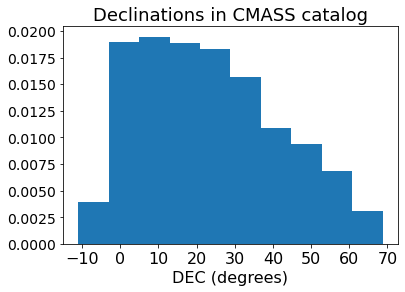

In [193]:
plt.title("Declinations in CMASS catalog", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=14)
plt.xlabel("DEC (degrees)", fontsize=16)
plt.hist(decs, density=True)

In [42]:
zs[np.logical_and(zs > 0.4, zs < 0.8)].size

810172

In [43]:
nzs

array([3.7340465e-04, 2.9369019e-05, 3.7565758e-04, ..., 2.6162149e-04,
       8.4141662e-05, 2.8893279e-04], dtype=float32)

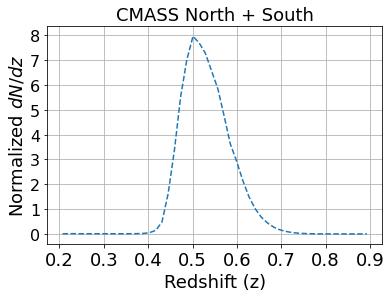

In [184]:
hist, bin_edges = np.histogram(zs, bins=50, range=[0.2, 0.9], weights=nzs, density=True)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.xlabel("Redshift (z)", fontsize=18)
plt.ylabel(r"Normalized $dN/dz$", fontsize=18)
plt.title("CMASS North + South", fontsize=18)
plt.plot(bin_centers, hist, '--')
plt.grid()

In [45]:
np.savetxt("galaxy_DR12v5_CMASS_both_zs.txt", zs)
np.savetxt("galaxy_DR12v5_CMASS_zs_dndz.txt", np.column_stack((bin_centers, hist)))

In [46]:
# equation 48 in Reid et al. 2016
def w_from_cat(catdata):
    w_systot = np.array(catdata['WEIGHT_SYSTOT'])
    w_noz    = np.array(catdata['WEIGHT_NOZ'])
    w_cp     = np.array(catdata['WEIGHT_CP'])
    
    return w_systot * (w_cp + w_noz - 1.)

ws = np.append(w_from_cat(cat_n_data), w_from_cat(cat_s_data))

In [47]:
np.savetxt("galaxy_DR12v5_CMASS_both_weights.txt", ws)

# Creating a map

### First, create a pixelization with healpix

In [158]:
NSIDE = 1024
pixel_indices = hp.ang2pix(NSIDE, ras, decs, lonlat=True)

### And bin them into a 1d array (soon to be healpix map)

In [159]:
NPIX = 12 * NSIDE**2
counts_map = np.histogram(pixel_indices, bins=NPIX,
                          weights=ws, range=[0, NPIX], density=False)[0].astype(np.float32)

### and compute overdensity

In [160]:
mask = hp.read_map("mask_CMASS_DR12_nside1024_total.fits")

In [161]:
counts_map_2 = np.copy(counts_map)
counts_map_2[mask < 0.9] = np.nan

nbar = np.nanmean(counts_map_2)
delta_map = counts_map / nbar - 1.
print(nbar)

0.30956686


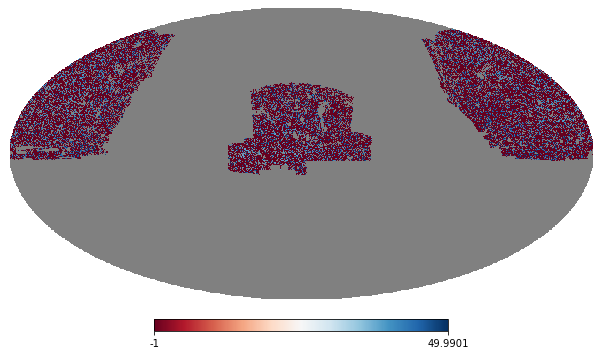

In [148]:
#delta_map[counts_map <= 1e-3] = hp.UNSEEN
delta_map[mask < 0.9] = hp.UNSEEN
hp.mollview(delta_map, cmap='RdBu', title='', norm='hist')

In [171]:
masked_delta_map = np.copy(delta_map)
masked_delta_map[mask < 0.9] = hp.UNSEEN

In [172]:
hp.write_map("cmass_counts_map_nside1024.fits", counts_map, overwrite=True)
hp.write_map("cmass_delta_map_nside1024.fits", delta_map, overwrite=True)
hp.write_map("cmass_delta_masked_map_nside1024.fits", masked_delta_map, overwrite=True)

setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


### compare that to orphics.catalog

In [163]:
import orphics
from orphics.catalogs import CatMapper
C = CatMapper(nside=1024, ras_deg=ras, decs_deg=decs, weights=ws, mask=mask)

Calculating pixels...
Done with pixels...
Calculating histogram...
Calculating histogram...


In [164]:
counts_map_catmapper = C.counts
delta_map_catmapper = C.get_delta()

In [165]:
np.nonzero(counts_map - counts_map_catmapper)[0].size
print(np.nonzero(delta_map - delta_map_catmapper)[0].size)

0


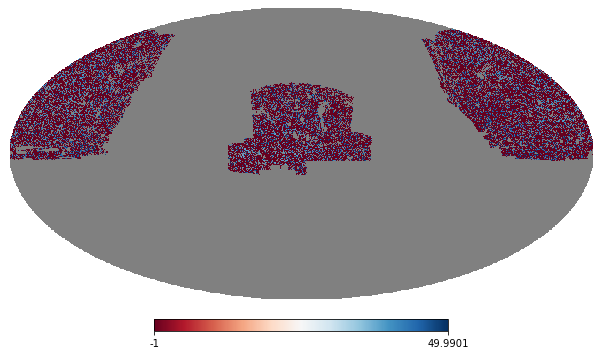

In [153]:
#delta_map[counts_map <= 1e-3] = hp.UNSEEN
delta_map_catmapper[mask < 0.9] = hp.UNSEEN
hp.mollview(delta_map_catmapper, cmap='RdBu', title='', norm='hist')

In [166]:
hp.write_map("cmass_counts_map_catmapper_nside1024.fits", counts_map_catmapper, overwrite=True)
hp.write_map("cmass_delta_map_catmapper_nside1024.fits", delta_map_catmapper, overwrite=True)

setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


In [155]:
C.nmean

0.30956686

### anafast test

In [156]:
#Get angular power spectrum for galaxy number counts and lensing
import camb
from camb.sources import GaussianSourceWindow, SplinedSourceWindow
from camb import model, initialpower
lmax = 3000

pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122)
pars.InitPower.set_params(As=2e-9, ns=0.965)
pars.set_for_lmax(lmax, lens_potential_accuracy=1)
#set Want_CMB to true if you also want CMB spectra or correlations
pars.Want_CMB = False 
#NonLinear_both or NonLinear_lens will use non-linear corrections
pars.NonLinear = model.NonLinear_both
#Set up W(z) window functions, later labelled W1, W2. Gaussian here.
pars.SourceWindows = [
    GaussianSourceWindow(redshift=0.55, source_type='counts', bias=2.0, sigma=0.1, dlog10Ndm=0.0)
    #SplinedSourceWindow(bias=2.0, dlog10Ndm=0.0, z=zs, W=dndz)
]

results = camb.get_results(pars)
cls = results.get_source_cls_dict()

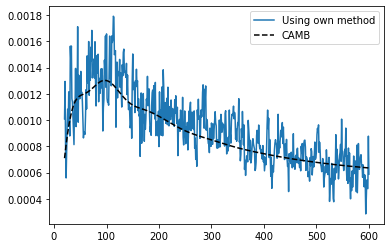

In [195]:
fsky = np.sum(mask) / mask.size
#clgg_anafast_catmap = hp.anafast(delta_map_catmapper, delta_map_catmapper, lmax=3*NSIDE) / fsky
clgg_anafast = hp.anafast(masked_delta_map, masked_delta_map, lmax=3*NSIDE) / fsky

#plt.semilogx(clgg_anafast_catmap, label="catmapper")
plt.clf()

#ells = np.arange(10,3*NSIDE+1)
ells = np.arange(20, 601)
plt.plot(ells, ells * (clgg_anafast[20:601]-3.37e-6), label="Using own method")
plt.plot(ells, ells * cls['W1xW1'][20:601] / (ells * (ells+1) / (2*np.pi)), '--', color='black', label="CAMB")

#plt.plot(ells, ells * (clgg_anafast_catmap[20:601]-3.74e-6), label="Using orphics.catalog")
plt.legend()